In [1]:
from astropy.table import Table
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mc

In [2]:
allstar_r10 = fits.getdata("/home/cody/Downloads/new-data-stuff/allStar-r10-l31c-58297.fits")

In [3]:
low_snr_mask = np.logical_and(100 < allstar_r10["SNR"], allstar_r10['SNR'] < 130)
iron_mask = np.logical_and(-1 < allstar_r10['FE_H'], allstar_r10['FE_H'] < 0)

In [6]:
plot1_mask = np.logical_and(np.logical_and(low_snr_mask, iron_mask), allstar_r10['TEFF'] > 0)

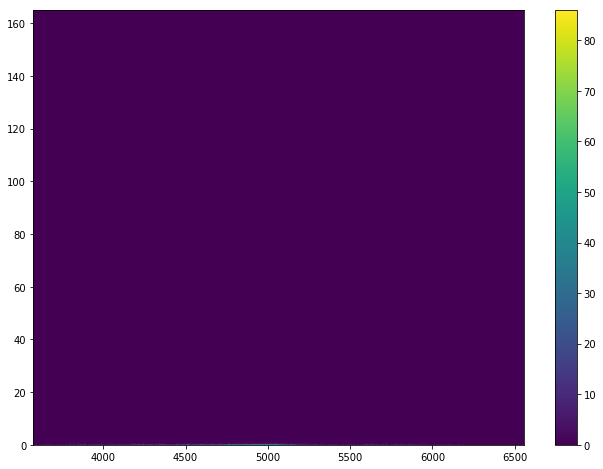

In [7]:
fig = plt.figure(figsize = (11,8))
plt.hist2d(allstar_r10['TEFF'][plot1_mask], allstar_r10["VSCATTER"][plot1_mask],bins = 1000)
plt.colorbar()
plt.show()
plt.close()

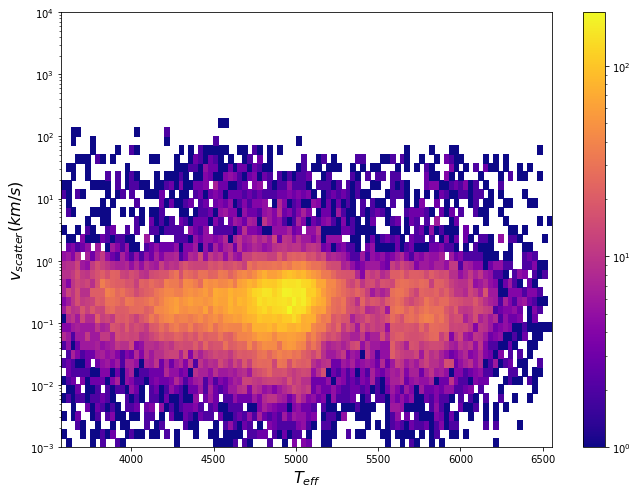

In [9]:
fig = plt.figure(figsize = (11,8))
h,xe, ye, i = plt.hist2d(allstar_r10['TEFF'][plot1_mask],
                         allstar_r10["VSCATTER"][plot1_mask],
                         bins = [100,np.logspace(-3, 4, 50)],
                         norm=mc.LogNorm(),
                         cmap = plt.cm.plasma)
#plt.ylim(0.01, 6)
plt.yscale('log')
plt.xlabel("$T_{eff}$", size = 16)
plt.ylabel("$v_{scatter} (km/s)$", size = 16)
plt.colorbar()

# for n in range(len(h)):
#     plt.plot(xe[n], np.mean(ye[1:]*h[n]), 'x', c = "C8")

plt.show()


In [ ]:
plt.hist(allstar_plot1['TEFF'])

In [10]:
teff_mask = np.logical_and(4000 < allstar_r10['TEFF'], allstar_r10['TEFF'] <= 4500)

In [12]:
len(allstar_r10)

459832

In [13]:
allstar_plot2 = allstar_r10[teff_mask]

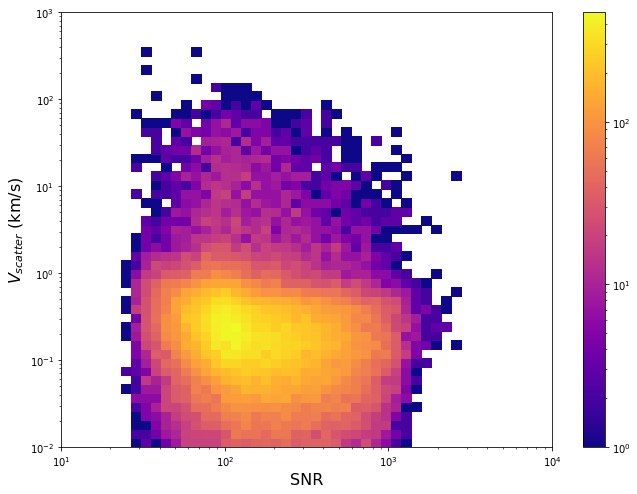

In [14]:
fig = plt.figure(figsize = (11,8))
plt.hist2d(allstar_plot2['SNR'], allstar_plot2["VSCATTER"],
           bins = [np.logspace(1, 4, 50),np.logspace(-2, 3, 50)],
           norm=mc.LogNorm(),
           cmap = plt.cm.plasma)
#plt.ylim(0.01, 6)
plt.yscale('log')
plt.xscale('log')
plt.xlabel("SNR", size = 16)
plt.ylabel("$V_{scatter}$ (km/s)", size = 16)
plt.colorbar()
plt.show()

In [ ]:
plt

In [15]:
teff_mask = np.logical_and(4000 < allstar_r10['TEFF'], allstar_r10['TEFF'] <= 4500)

In [16]:
low_snr_mask = np.logical_and(80 < allstar_r10["SNR"], allstar_r10['SNR'] < 130)
teff_mask = np.logical_and(3500 < allstar_r10['TEFF'], allstar_r10['TEFF'] < 6500)
plot3_mask = np.logical_and(low_snr_mask, teff_mask)

In [17]:
scat = allstar_r10['VSCATTER'][np.logical_and(plot3_mask, allstar_r10['FE_H'] > -3)]
iron = allstar_r10['FE_H'][np.logical_and(plot3_mask, allstar_r10['FE_H'] > -3)]

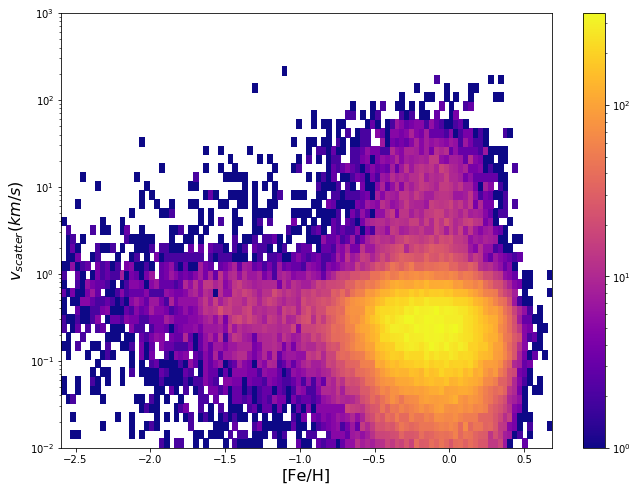

In [18]:

fig = plt.figure(figsize = (11,8))
plt.hist2d(iron, scat, bins = [100,np.logspace(-2, 3, 50)],
           norm=mc.LogNorm(),
          cmap = plt.cm.plasma)
#plt.ylim(0.01, 6)
plt.yscale('log')
plt.xlabel("[Fe/H]", size = 16)
plt.ylabel("$v_{scatter} (km/s)$", size = 16)
plt.colorbar()

plt.show()


In [ ]:
min(allstar_r10['VSCATTER'])

# SMC stuff

In [42]:
from astropy.table import vstack
smc = Table(fits.getdata("/home/cody/Downloads/new-data-stuff/r11smc/apField-SMC1.fits"))
for n in range(2,8):
    smc_foo = Table(fits.getdata("/home/cody/Downloads/new-data-stuff/r11smc/apField-SMC{}.fits".format(n)))
    smc = vstack([smc, smc_foo])
    
smc_v = Table(fits.getdata("/home/cody/Downloads/new-data-stuff/r11smc/apFieldVisits-SMC1.fits"))
for n in range(2,8):
    smc_foo_v = Table(fits.getdata("/home/cody/Downloads/new-data-stuff/r11smc/apFieldVisits-SMC{}.fits".format(n)))
    smc_v = vstack([smc_v, smc_foo_v])

In [24]:
smc = Table(fits.getdata("/home/cody/Downloads/new-data-stuff/r11smc/apField-SMC1.fits"))

In [26]:
smc_foo = Table(fits.getdata("/home/cody/Downloads/new-data-stuff/r11smc/apField-SMC2.fits"))

In [45]:
smc_v.write('allVisit-r11-smc.fits')

In [46]:
smc.write('allStar-r11-smc.fits')

In [49]:
%run DataSimp.py
dsimp = DataSimp('/home/cody/Binary Search/allStar-r11-smc.fits',
                 '/home/cody/Binary Search/allVisit-r11-smc.fits',
                 '/home/cody/Binary Search/parsec_decamsdss_all.fits.gz')

In [50]:
all_average, all_visit, iso = dsimp.get_data()
len(all_visit)

10766

In [51]:
all_visit = dsimp.cuts(all_visit)

In [52]:
print(len(all_average))
all_average = dsimp.nvisits_cut(all_average[0:5000], 5)
print(len(all_average))

2416
864


In [53]:
all_average = dsimp.rg_cut(all_average)
len(all_average)

KeyError: "Key 'TEFF' does not exist."